# Linear Regression

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/home/foriequal0/.local/share/virtualenvs/tf-tutorial-pgL6-UTG/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# Parameters

learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [10]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)/(2*n_samples))
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050, cost=0.131451696, W=0.380153, b=-0.137768


Epoch: 0100, cost=0.125155315, W=0.372388, b=-0.081907


Epoch: 0150, cost=0.119586296, W=0.365085, b=-0.029369


Epoch: 0200, cost=0.114660576, W=0.358216, b=0.020045


Epoch: 0250, cost=0.110303983, W=0.351756, b=0.066520


Epoch: 0300, cost=0.106450692, W=0.345680, b=0.110231


Epoch: 0350, cost=0.103042625, W=0.339965, b=0.151342


Epoch: 0400, cost=0.100028381, W=0.334590, b=0.190008


Epoch: 0450, cost=0.097362466, W=0.329535, b=0.226374


Epoch: 0500, cost=0.095004633, W=0.324780, b=0.260578


Epoch: 0550, cost=0.092919327, W=0.320309, b=0.292747


Epoch: 0600, cost=0.091075078, W=0.316103, b=0.323003


Epoch: 0650, cost=0.089444049, W=0.312147, b=0.351459


Epoch: 0700, cost=0.088001549, W=0.308427, b=0.378224


Epoch: 0750, cost=0.086725861, W=0.304928, b=0.403396


Epoch: 0800, cost=0.085597694, W=0.301637, b=0.427071


Epoch: 0850, cost=0.084600009, W=0.298542, b=0.449338


Epoch: 0900, cost=0.083717704, W=0.295630, b=0.470281


Epoch: 0950, cost=0.082937516, W=0.292892, b=0.489978


Epoch: 1000, cost=0.082247600, W=0.290317, b=0.508503
Optimization Finished!
Training cost= 0.0822476 W= 0.290317 b= 0.508503


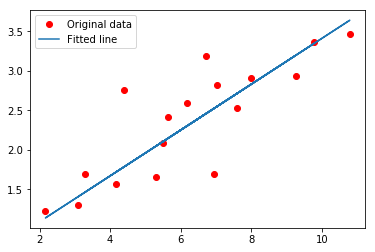

In [12]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print('Epoch: {:04d}, cost={:.9f}, W={:f}, b={:f}'
                  .format(epoch+1, c, sess.run(W), sess.run(b)))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()